In [ ]:
# imports
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# current classifier we are working with and if we are doing subclass categories
curr_classif = 'abgi_7class_auto'
sub_class = True

# folder containing all csv files
folder_path = 'G:/Shared drives/BioSoundSCape_ABG/BirdNET final results/raven_train_models/'
test_results = folder_path + curr_classif + '/test/'
output_csv = folder_path + curr_classif + '/test_results.csv'
output_cm = folder_path + curr_classif + '/test_cm.png'

print(test_results, output_csv, output_cm)

G:/Shared drives/BioSoundSCape_ABG/BirdNET final results/raven_train_models/abgi_7class_auto/test/ G:/Shared drives/BioSoundSCape_ABG/BirdNET final results/raven_train_models/abgi_7class_auto/test_results.csv G:/Shared drives/BioSoundSCape_ABG/BirdNET final results/raven_train_models/abgi_7class_auto/test_cm.png


In [ ]:
# list all csv files in folder
csv_files = glob.glob(test_results + '*.csv')
print(len(csv_files))

350


In [ ]:
combined_df = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    # add wav file name
    wav_name = csv_file[:-20].split('\\')[1]
    df['File name'] = wav_name

    # add wav classification data
    wav_name = wav_name.split('_') # just get data of image
    wav_label = wav_name[-2]
    wav_group = wav_name[-1]
    df['Label'] = wav_label
    df['Species group'] = wav_group

    # group by start time and choose the rows with highest confidence
    chosen = df.groupby('Start (s)')['Confidence'].idxmax()

    # append these rows to a new df
    combined_df.append(df.loc[chosen])

# convert to a dataframe
combined_df = pd.concat(combined_df, ignore_index=True)
combined_df.to_csv(output_csv, index=False)

C:\Users\kathy\AppData\Local\Temp\ipykernel_20800\3746418562.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(combined_df, ignore_index=True)


0.8305400372439479
G:/Shared drives/BioSoundSCape_ABG/BirdNET final results/raven_train_models/abgi_7class_auto/test_cm.png


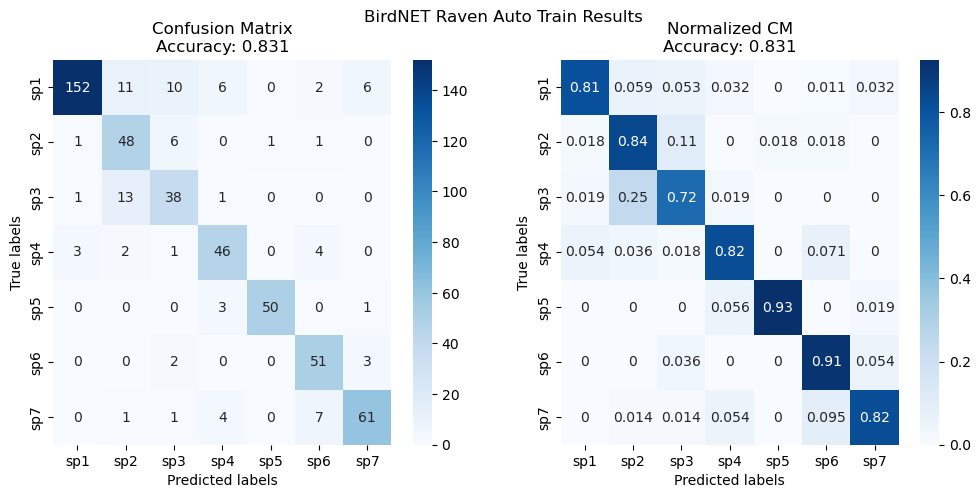

In [ ]:
# create confusion matrix
if sub_class:
    y_true = combined_df['Species group'].values
else:
    y_true = combined_df['Label'].values

y_pred = combined_df['Scientific name'].values

# calculate confusion matrix and accuracy
cm = confusion_matrix(y_true, y_pred)
cm_norm = confusion_matrix(y_true, y_pred, normalize='true')
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)
print(output_cm)

# plot confusion matrix
if sub_class:
    classes = ['sp1', 'sp2', 'sp3', 'sp4', 'sp5', 'sp6',  'sp7']
else:
    classes = ['A', 'B', 'G', 'I']

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# first confusion matrix with total number
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, ax=ax[0], fmt='d')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].set_title(f'Confusion Matrix\nAccuracy: {accuracy:.3f}')

# second confusion matrix with normalized percentages
sns.heatmap(cm_norm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, ax=ax[1])
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
ax[1].set_title(f'Normalized CM\nAccuracy: {accuracy:.3f}')

fig.suptitle('BirdNET Raven Auto Train Results')
plt.savefig(output_cm) # save the confusion matrix as png
plt.show()